<a href="https://colab.research.google.com/github/Debduti/Machine-Learning-Unsupervised-Learning/blob/main/Wine_Dataset_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an exercise to categorize all wines in the scikit-learn Wine dataset into clusters to group similar wines together.

## Import libraries

We start by importing all necessary libraries

In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
%matplotlib inline

## Load Dataset

We load the wine dataset and convert it to a Pandas dataframe

In [18]:

# Load the dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
df.shape

(178, 14)

The dataset has 14 features, so it would be impossible to represent it via scatterplot.

## Preprocess Dataset

We then proceed to preprocess the dataset. It is fairly clean, so we just need to standardise the features, so they are all on the same scale of 0 to 1.

In [31]:

# Preprocess the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


##Elbow Plot

We now need to determine the best value of K, or the best number of clusters. This is determined by drawing an elbow plot. Here , we calculate the sum of squared errors (SSE) of all clusters for all possible values of k , in a predefined range. We have chosen a range of 1 to 10. So we calculate SSE for K=1, for K =2,.. until K=10. We then plot the SSE values against the values of K. The K value where we see the SSE value stops reducing drastically and almost flattens is the optimum value. Any higher- will lead to overfitting, and a new datapoint will be placed in the wrong cluster.

In [23]:
#Elbow Plot

sse = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters= k)
  km.fit(df_scaled)
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

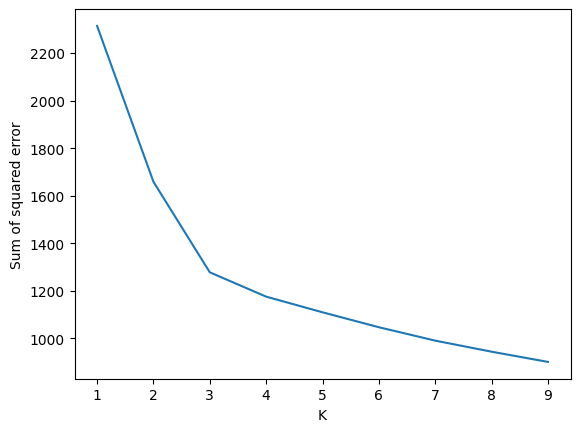

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

## Clustering

Now that we have determined that 3 is the number of clusters that we need, we proceed to divide the dataset into 3 clusters.

In [21]:

# Choose the number of clusters
n_clusters = 3

# Create the KMeans model and fit it to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataframe
df["Cluster"] = labels

# Analyze the clusters
for i in range(n_clusters):
    cluster_df = df[df["Cluster"] == i]
    print(f"Cluster {i}:")
    print(f"- Number of data points: {len(cluster_df)}")
    print(f"- Average alcohol content: {cluster_df['alcohol'].mean():.2f}")
    print(f"- Average malic acid content: {cluster_df['malic_acid'].mean():.2f}")
    print("")

Cluster 0:
- Number of data points: 62
- Average alcohol content: 13.68
- Average malic acid content: 2.00

Cluster 1:
- Number of data points: 51
- Average alcohol content: 13.13
- Average malic acid content: 3.31

Cluster 2:
- Number of data points: 65
- Average alcohol content: 12.25
- Average malic acid content: 1.90



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
